In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Poisson's equation in 2D is the same as Laplace's equation but with a source term in the right-hand-side of the equation:

$$
\dfrac{\partial ^2 p}{\partial x^2} + \dfrac{\partial^2 p}{\partial y^2} = b
$$


The Poisson's equation is used to 'relax' the initial sources in the field. The discretized form id the same as before:

$$
\dfrac{p_{i+1,j}^n-2p^n_{i,j}+p^n_{i-1,j}}{\Delta x^2} + \dfrac{p^n_{i,j+1}-2p^n_{i,j}+p^n_{i,j-1}}{\Delta y^2}=b^n_{i,j}
$$

Rearranging this equation and solving for $p^n_{i,j}$:

$$
p^n_{i,j}=\dfrac{\Delta y^2 \left( p^n_{i+1,j}+p^n_{i-1,j} \right) + \Delta x^2 \left( p^n_{i,j+1} +p^n_{i,j-1} \right) - b^n_{i,j} \Delta x^2 \Delta y^2}{2(\Delta x^2 + \Delta y^2)}
$$

The conditions applied to these equations are:
* **Initial conditions:** 

$$
p=0
$$

* **Boundary conditions:**

$$
\begin{Bmatrix}
    p = 0 & \text{at} & x = 0 \\
    p = 0 & \text{at} & x = 2 \\
    p = 0 & \text{at} & y = 0, 1
\end{Bmatrix}
$$

* **Initial spikes - source term:**

$$
\begin{Bmatrix}
    b_{i,j} = 100 & at & i = nx/4, & j = ny/4 \\
    b_{i,j} = -100 & at & i = \dfrac{3nx}{4}, & j = \dfrac{3ny}{4} \\
    b_{i,j} = 0 & at & \text{everywhere else} &
\end{Bmatrix}
$$

In [9]:
nx = 50
ny = 50
nt = 100
xmin = 0
xmax = 2
ymin = 0
ymax = 1

dx = (xmax - xmin)/(nx - 1)
dy = (ymax - ymin)/(ny - 1)

p = np.zeros((ny,nx))
pd = np.zeros((ny,nx))
b = np.zeros((ny,nx))
x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)

#source terms
b[int(ny/4),int(nx/4)] = 100
b[int(3*ny/4), int(3*nx/4)] = -100

In [10]:
def plot2D(x, y, p):
    fig = plt.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x,y)
    surf = ax.plot_surface(X, Y, p, rstride = 1, cstride = 1, cmap = cm.viridis, linewidth = 0, antialiased = False)
    ax.set_xlim(0,2)
    ax.set_ylim(0,1)
    ax.view_init(30,225)
    ax.set_xlabel('$x$')
    ax.set_xlabel('$y$')

In [11]:
def Poisson2D(nt):
    for it in range(nt):
        pd = p.copy()
        
        p[1:-1, 1:-1] = (((pd[1:-1, 2:] + pd[1:-1, :-2])*dy**2 + (pd[2:, 1:-1] + pd[:-2, 1:-1])*dx**2 - b[1:-1, 1:-1]* dx**2 *dy**2)/(2*(dx**2+dy**2)))
        
        p[0, :] = 0
        p[ny-1, :] = 0
        p[:, 0] = 0
        p[:, nx-1] = 0
        
    return p

In [24]:
p = np.zeros((ny,nx))
pd = np.zeros((ny,nx))

p = Poisson2D(50)

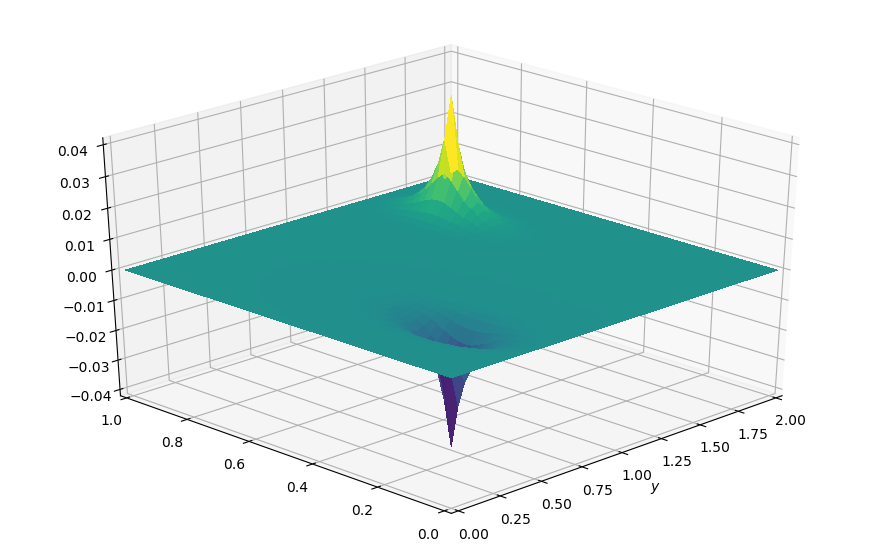

In [25]:
plot2D(x, y, p)